# Question 1

In [70]:
import sqlite3

conn = sqlite3.connect('vis_junxiang.sqlite')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS GapMinder')
cursor.execute('CREATE TABLE GapMinder(country TEXT, continent TEXT, year INTEGER, lifeExp REAL, pop INTEGER, gdpPercap REAL)')
conn.commit()

# Question 2

In [71]:
import pandas as pd

dataframe = pd.read_csv('gapminder.tsv', delimiter='\t')

print(dataframe.head(3))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710


# Question 3

In [72]:
dataframe.to_sql('GapMinder', conn, if_exists='replace', index=False)
cur = conn.cursor()
cur.execute('SELECT * FROM GapMinder LIMIT 10')
rows = cur.fetchall()

for row in rows:
    print(row)

('Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145)
('Afghanistan', 'Asia', 1957, 30.332, 9240934, 820.8530296)
('Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.10071)
('Afghanistan', 'Asia', 1967, 34.02, 11537966, 836.1971382)
('Afghanistan', 'Asia', 1972, 36.088, 13079460, 739.9811058)
('Afghanistan', 'Asia', 1977, 38.438, 14880372, 786.11336)
('Afghanistan', 'Asia', 1982, 39.854, 12881816, 978.0114388)
('Afghanistan', 'Asia', 1987, 40.822, 13867957, 852.3959448)
('Afghanistan', 'Asia', 1992, 41.674, 16317921, 649.3413952)
('Afghanistan', 'Asia', 1997, 41.763, 22227415, 635.341351)


# Question 4

In [73]:
dataframe = pd.read_sql_query('SELECT * FROM GapMinder', conn)

# Display the top-5 rows of the DataFrame
print(dataframe.head(5))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


# Question 5

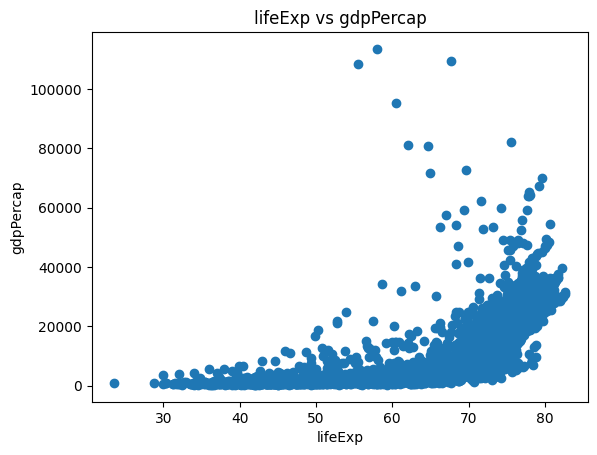

In [74]:
import matplotlib.pyplot as plt

dataframe = pd.read_sql_query('SELECT * FROM GapMinder', conn)

plt.scatter(dataframe['lifeExp'], dataframe['gdpPercap'])
plt.xlabel('lifeExp')
plt.ylabel('gdpPercap')
plt.title('lifeExp vs gdpPercap')
plt.show()

# Question 6

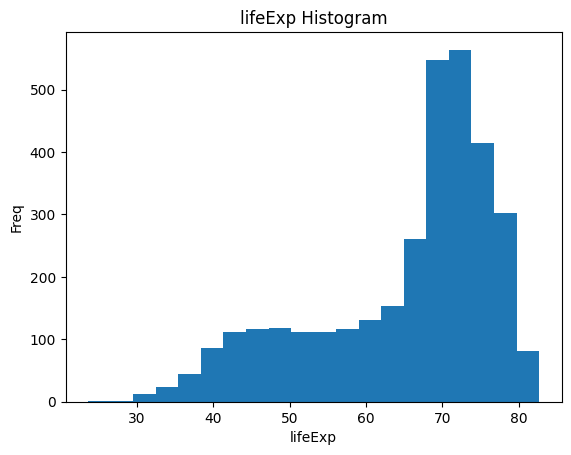

In [75]:
plt.hist(dataframe['lifeExp'], bins=20)
plt.xlabel('lifeExp')
plt.ylabel('Freq')
plt.title('lifeExp Histogram')
plt.show()

# Question 7

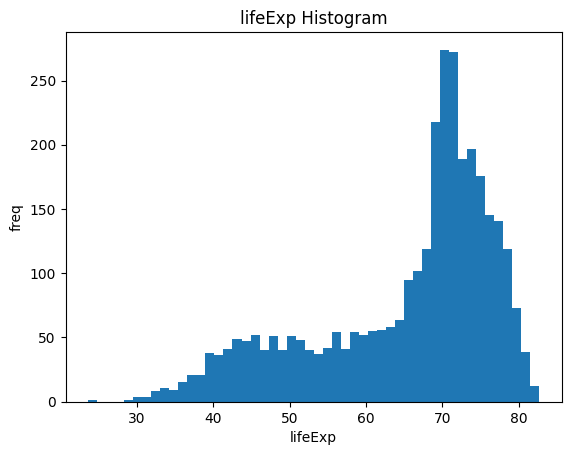

In [76]:
plt.hist(dataframe['lifeExp'], bins=50)
plt.xlabel('lifeExp')
plt.ylabel('freq')
plt.title('lifeExp Histogram')
plt.show()

# Question 8

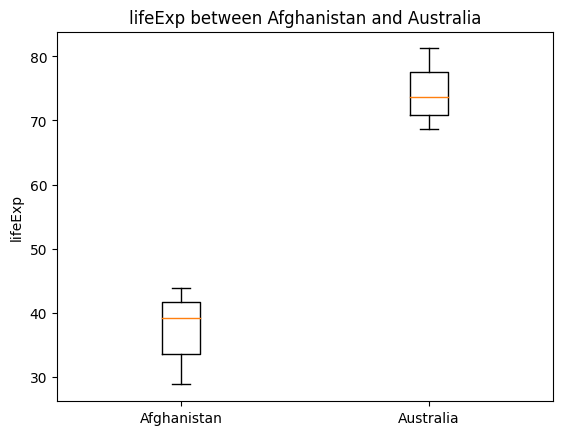

In [77]:

dataframe = pd.read_sql_query("SELECT * FROM GapMinder WHERE country IN ('Afghanistan', 'Australia')", conn)
plt.boxplot([dataframe[dataframe['country'] == 'Afghanistan']['lifeExp'], dataframe[dataframe['country'] == 'Australia']['lifeExp']])
plt.xticks([1, 2], ['Afghanistan', 'Australia'])
plt.ylabel('lifeExp')
plt.title('lifeExp between Afghanistan and Australia')
plt.show()


# Question 9

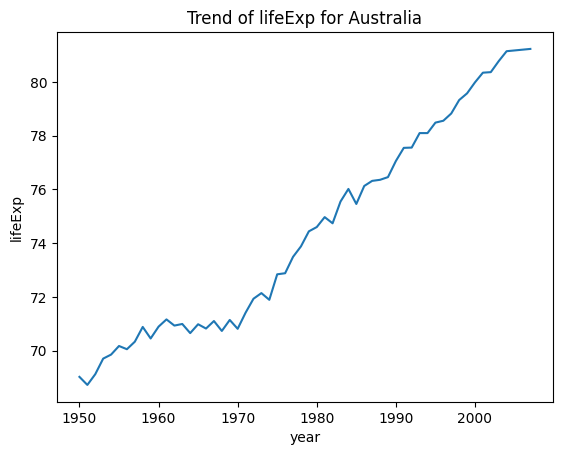

In [78]:
dataframe = pd.read_sql_query("SELECT * FROM GapMinder WHERE country = 'Australia'", conn)

plt.plot(dataframe['year'], dataframe['lifeExp'])
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.title('Trend of lifeExp for Australia')
plt.show()


# Question 10

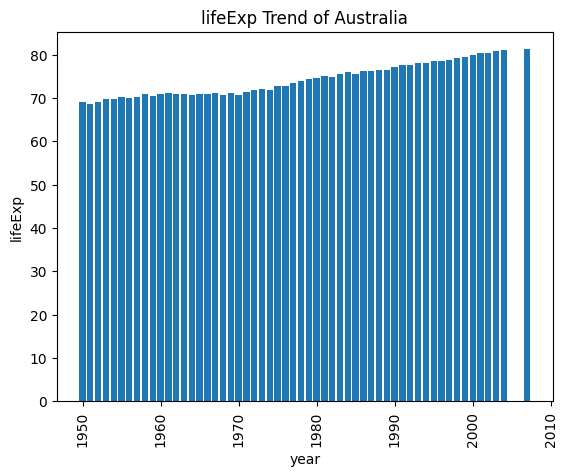

<Figure size 1200x600 with 0 Axes>

In [79]:
dataframe = pd.read_sql_query("SELECT * FROM GapMinder WHERE country = 'Australia' ORDER BY year", conn)

plt.bar(dataframe['year'], dataframe['lifeExp'])
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.title('lifeExp Trend of Australia')
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()

# Question 11

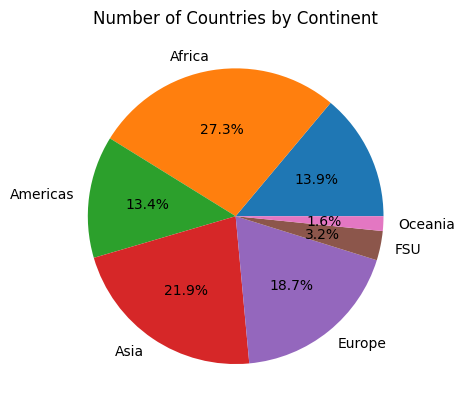

In [81]:
dataframe = pd.read_sql_query('SELECT continent, COUNT(DISTINCT country) as num_countries FROM GapMinder GROUP BY continent', conn)

plt.pie(dataframe['num_countries'], labels=dataframe['continent'], autopct='%1.1f%%')
plt.title('Number of Countries by Continent')
plt.show()

# Question 12

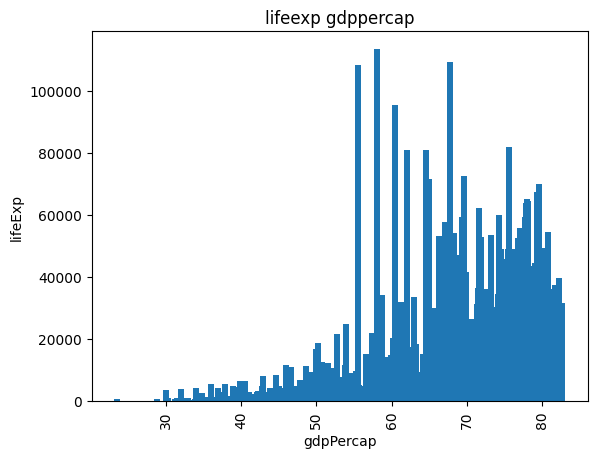

<Figure size 1200x600 with 0 Axes>

In [91]:


dataframe = pd.read_sql_query('SELECT * FROM GapMinder', conn)

plt.bar(dataframe['lifeExp'], dataframe['gdpPercap'])
plt.xlabel('gdpPercap')
plt.ylabel('lifeExp')
plt.title('lifeexp gdppercap')
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()